# Importing Data And Libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-analysis/netflix_movies (1).csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
content_df = pd.read_csv(r'/kaggle/input/netflix-data-analysis/netflix_movies (1).csv')

# Data Cleaning

In [5]:
content_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Exploratory Data Analysis (EDA)

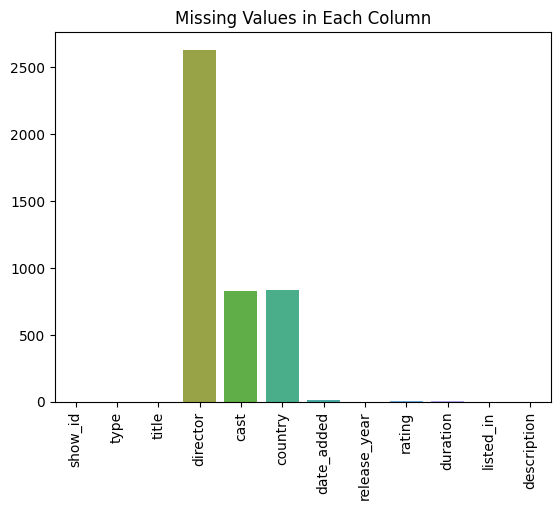

In [6]:
# Data Overview and Missing Values Analysis
missing_values = content_df.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

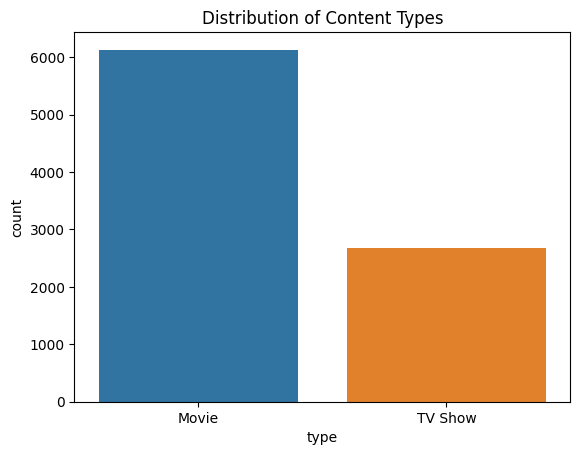

In [7]:
# Distribution of Content Types
sns.countplot(x='type', data=content_df)
plt.title('Distribution of Content Types')
plt.show()

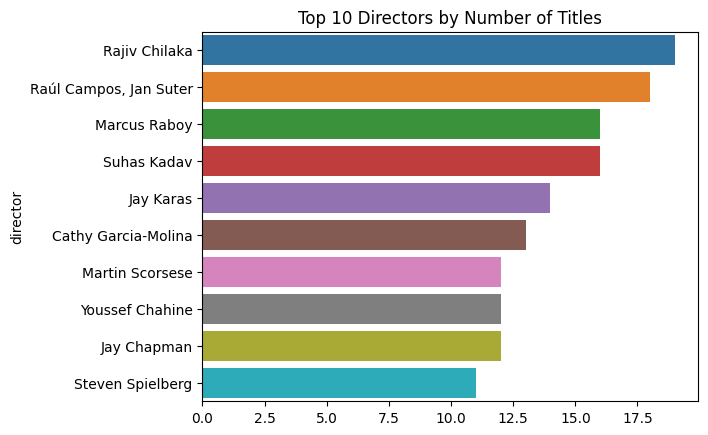

In [8]:
# Top Directors with Most Titles
top_directors = content_df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors by Number of Titles')
plt.show()

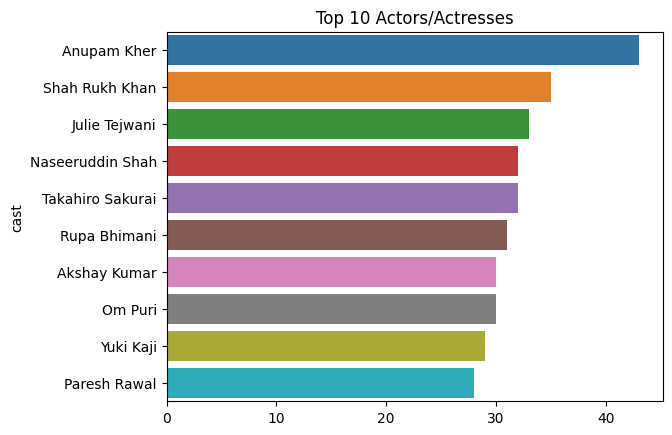

In [9]:
# Cast Analysis: Most Frequent Actors/Actresses
cast_members = content_df['cast'].dropna().str.split(', ').explode()
top_cast = cast_members.value_counts().head(10)
sns.barplot(y=top_cast.index, x=top_cast.values)
plt.title('Top 10 Actors/Actresses')
plt.show()

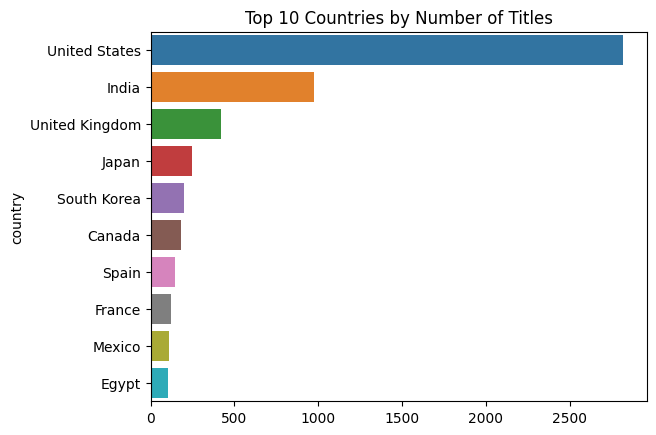

In [10]:
# Content Distribution by Country
top_countries = content_df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.show()

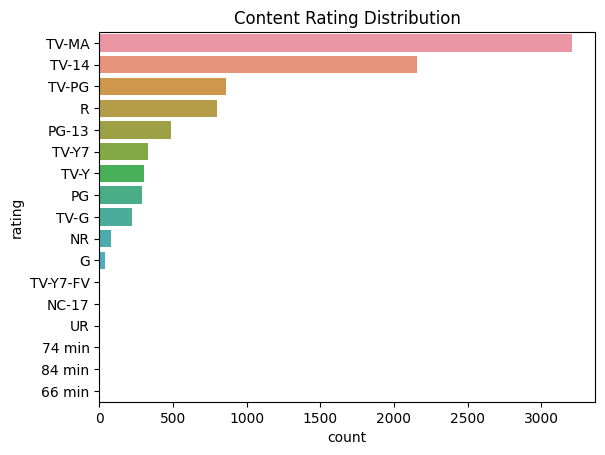

In [11]:
# Rating Distribution
sns.countplot(y='rating', data=content_df, order=content_df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.show()

In [12]:
#Drop Duplicate Values
content_df.dropna(inplace=True)

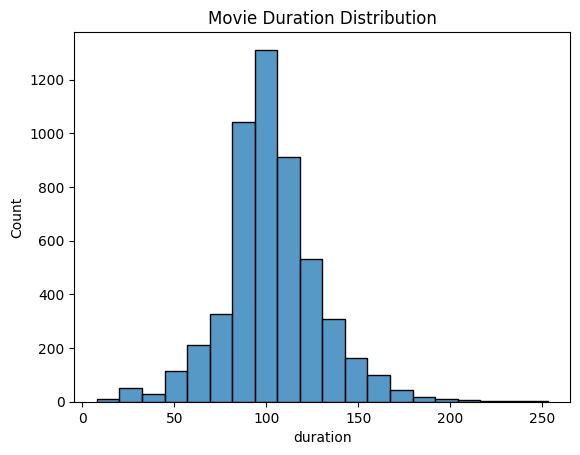

In [13]:
# Duration Analysis
movies = content_df[content_df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
sns.histplot(movies['duration'], bins=20)
plt.title('Movie Duration Distribution')
plt.show()

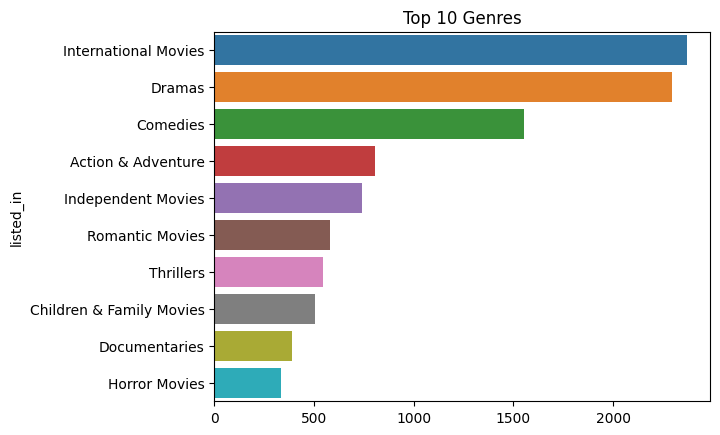

In [14]:
# Popular Genres
genres = content_df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 10 Genres')
plt.show()

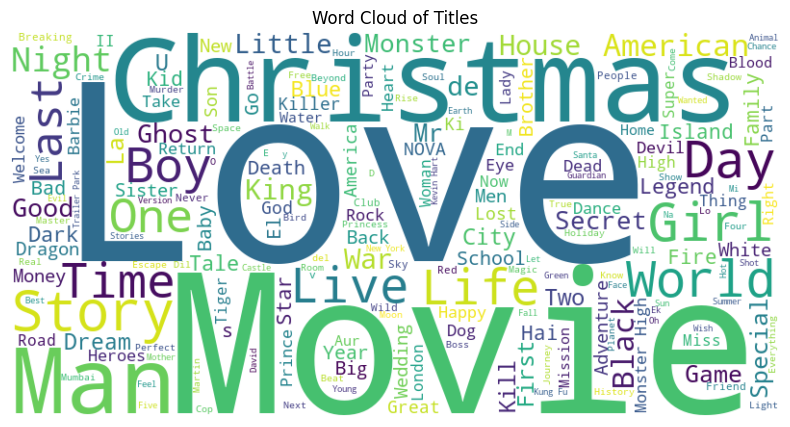

In [15]:
#Word Cloud of Titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(content_df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

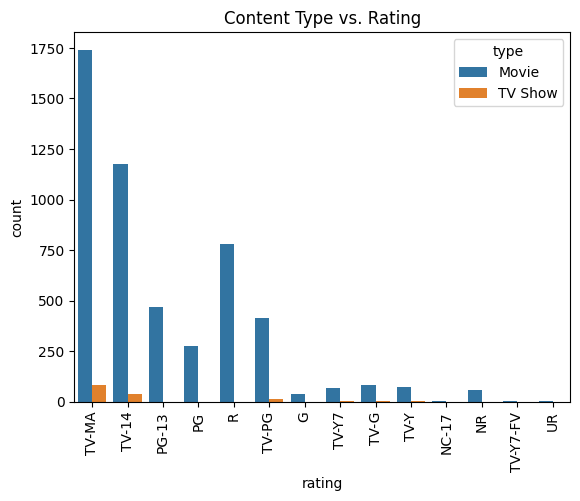

In [16]:
# Relationship between Content Type and Rating
sns.countplot(x='rating', hue='type', data=content_df)
plt.title('Content Type vs. Rating')
plt.xticks(rotation=90)
plt.show()

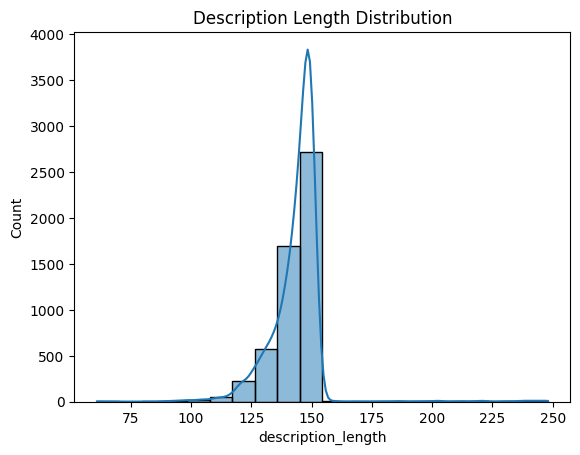

In [17]:
# Content Description Length Analysis
content_df['description_length'] = content_df['description'].apply(lambda x: len(str(x)))
sns.histplot(content_df['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.show()

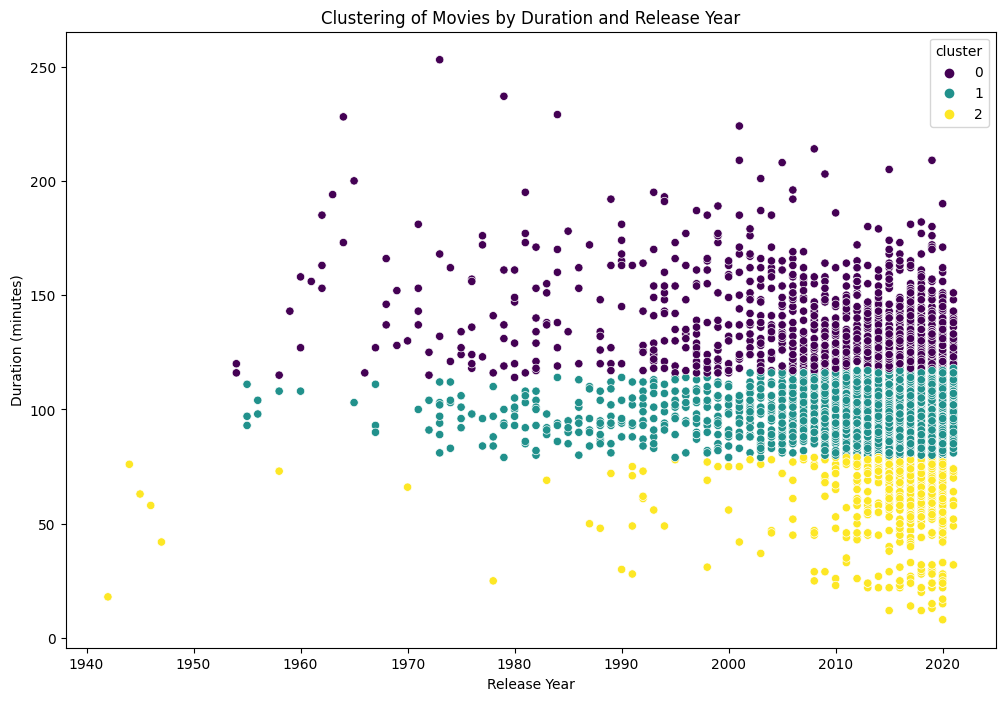

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Clustering Plot Based on Movie Duration and Release Year
# Filtering for movies and extracting relevant features
movies = content_df[content_df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)

# Removing rows with missing values for clustering
movies_filtered = movies.dropna(subset=['duration', 'release_year'])

# Preparing the data for clustering
X = movies_filtered[['duration', 'release_year']]

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
movies_filtered['cluster'] = kmeans.labels_

# Plotting the clusters using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=movies_filtered, x='release_year', y='duration', hue='cluster', palette='viridis')
plt.title('Clustering of Movies by Duration and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

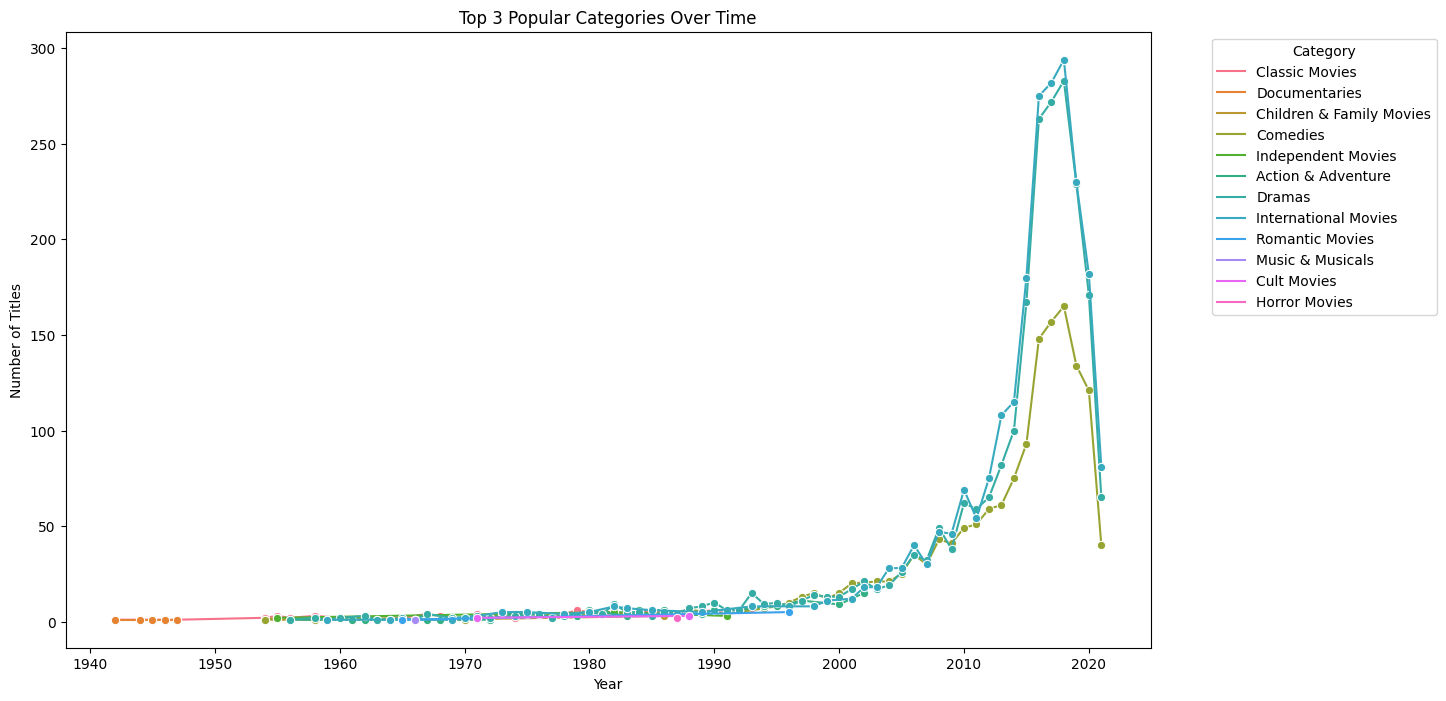

In [19]:
# Analysis of Popular Years for Popular Categories
# Split the 'listed_in' column into separate genres and explode to get individual rows for each genre
df_exploded = content_df.assign(listed_in=content_df['listed_in'].str.split(', ')).explode('listed_in')

# Group by year and genre to count the number of titles in each combination
popular_years = df_exploded.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Find the top categories for each year
top_categories_by_year = popular_years.sort_values(['release_year', 'count'], ascending=[True, False]).groupby('release_year').head(3)

# Plot the results
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_categories_by_year, x='release_year', y='count', hue='listed_in', marker='o')
plt.title('Top 3 Popular Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()